In [449]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [450]:
healthdata = pd.read_csv("C:\\Users\\fhdns\\Downloads\\healthdata4.txt")

데이터의 구조

In [451]:
healthdata.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


데이터의 정보

In [452]:
healthdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

결측치를 전부 제거함.

In [453]:
healthdata2 = healthdata.dropna(axis = 0)

결측치 제거 결과 총 125537개의 표본수 남음.

In [454]:
healthdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125537 entries, 6 to 999969
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   기준년도          125537 non-null  int64  
 1   가입자 일련번호      125537 non-null  int64  
 2   시도코드          125537 non-null  int64  
 3   성별코드          125537 non-null  int64  
 4   연령대 코드(5세단위)  125537 non-null  int64  
 5   신장(5Cm단위)     125537 non-null  int64  
 6   체중(5Kg 단위)    125537 non-null  int64  
 7   허리둘레          125537 non-null  float64
 8   시력(좌)         125537 non-null  float64
 9   시력(우)         125537 non-null  float64
 10  청력(좌)         125537 non-null  float64
 11  청력(우)         125537 non-null  float64
 12  수축기 혈압        125537 non-null  float64
 13  이완기 혈압        125537 non-null  float64
 14  식전혈당(공복혈당)    125537 non-null  float64
 15  총 콜레스테롤       125537 non-null  float64
 16  트리글리세라이드      125537 non-null  float64
 17  HDL 콜레스테롤     125537 non-null  float64
 18  LDL 

회귀분석 진행을 위해 연속형 변수들만 남긴 healthdata3 데이터프레임 생성함.

In [455]:
healthdata3 = healthdata2.drop(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '청력(좌)', '청력(우)', '흡연상태', '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'], axis = 1)

In [456]:
healthdata3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125537 entries, 6 to 999969
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   연령대 코드(5세단위)  125537 non-null  int64  
 1   신장(5Cm단위)     125537 non-null  int64  
 2   체중(5Kg 단위)    125537 non-null  int64  
 3   허리둘레          125537 non-null  float64
 4   시력(좌)         125537 non-null  float64
 5   시력(우)         125537 non-null  float64
 6   수축기 혈압        125537 non-null  float64
 7   이완기 혈압        125537 non-null  float64
 8   식전혈당(공복혈당)    125537 non-null  float64
 9   총 콜레스테롤       125537 non-null  float64
 10  트리글리세라이드      125537 non-null  float64
 11  HDL 콜레스테롤     125537 non-null  float64
 12  LDL 콜레스테롤     125537 non-null  float64
 13  혈색소           125537 non-null  float64
 14  요단백           125537 non-null  float64
 15  혈청크레아티닌       125537 non-null  float64
 16  (혈청지오티)AST    125537 non-null  float64
 17  (혈청지오티)ALT    125537 non-null  float64
 18  감마 지

결측치를 없애고 연속형 변수만 남은 데이터셋에서 이상치를 제거하기 위한 함수를 생성. 이상치 제거는 IQR을 활용해 사분위수에서 벗어난 수를 이상치로 간주해 제거하는 방식을 사용.

In [457]:
quartile_1 = healthdata3.quantile(0.25)
quartile_3 = healthdata3.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (healthdata3 < (quartile_1 - 1.5 * IQR)) | (healthdata3 > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
healthdata3 = healthdata3[condition]

이상치를 제거하자 40000개 가량의 데이터가 남음.

In [458]:
healthdata3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39715 entries, 6 to 999951
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연령대 코드(5세단위)  39715 non-null  int64  
 1   신장(5Cm단위)     39715 non-null  int64  
 2   체중(5Kg 단위)    39715 non-null  int64  
 3   허리둘레          39715 non-null  float64
 4   시력(좌)         39715 non-null  float64
 5   시력(우)         39715 non-null  float64
 6   수축기 혈압        39715 non-null  float64
 7   이완기 혈압        39715 non-null  float64
 8   식전혈당(공복혈당)    39715 non-null  float64
 9   총 콜레스테롤       39715 non-null  float64
 10  트리글리세라이드      39715 non-null  float64
 11  HDL 콜레스테롤     39715 non-null  float64
 12  LDL 콜레스테롤     39715 non-null  float64
 13  혈색소           39715 non-null  float64
 14  요단백           39715 non-null  float64
 15  혈청크레아티닌       39715 non-null  float64
 16  (혈청지오티)AST    39715 non-null  float64
 17  (혈청지오티)ALT    39715 non-null  float64
 18  감마 지티피        39715 non-n

상관계수 플롯 구성. 신장, 체중, 트리글리세라이드, 혈압 등과 상관계수가 유의미하게 있어 보이는 혈색소 변수를 종속변수로 지정해서 진행.

<AxesSubplot:>

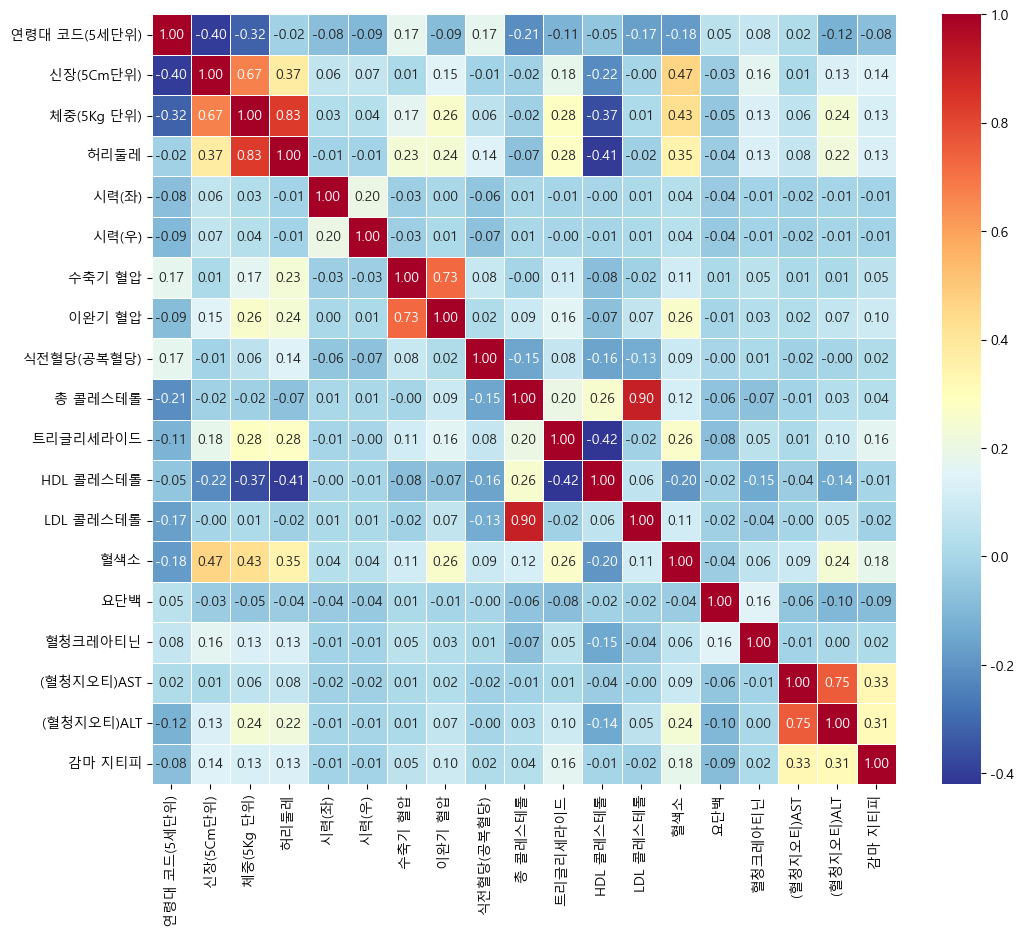

In [459]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (12, 10))
sns.heatmap(healthdata3.corr(), cmap = 'RdYlBu_r', annot=True, fmt='.2f', linewidths=0.5)

종속변수의 히스토그램과 qqlpot, 로그변환한 종속변수의 히스토그램과 qqplot을 살펴 봤을 때 
로그변환 하지 않은 종속변수가 정규분포에 더 가까워 보이기 때문에 로그변환 하지 않고 진행.

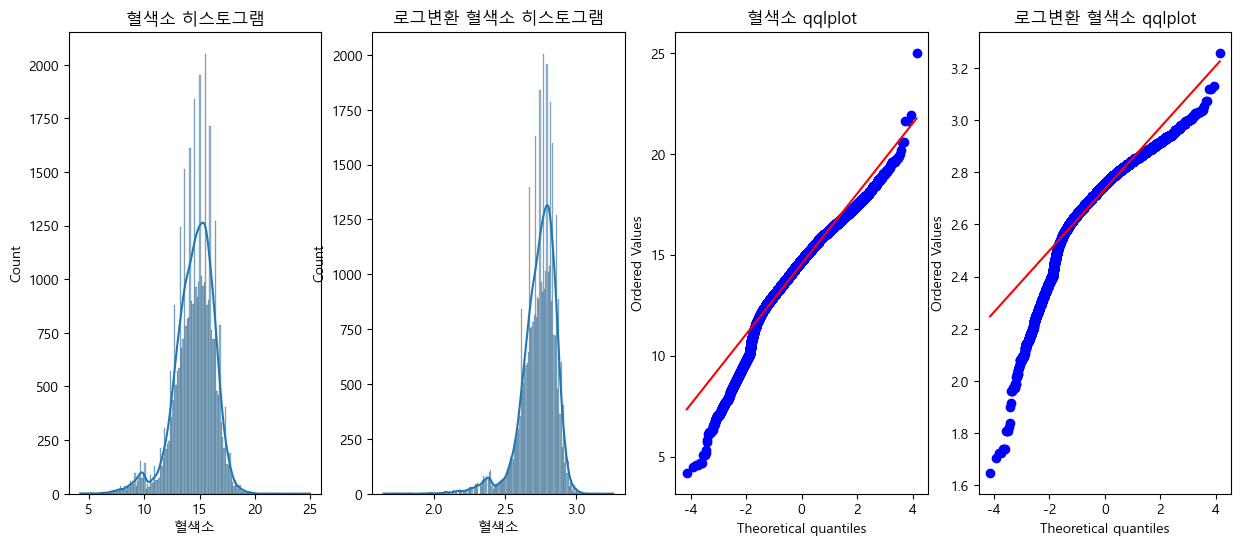

In [460]:
from scipy import stats

fig, axs = plt.subplots(1,4, figsize = (15,6))

sns.histplot(healthdata3["혈색소"], ax =axs[0], kde=True)
sns.histplot(np.log1p(healthdata3["혈색소"]), ax=axs[1], kde=True)
stats.probplot(healthdata3["혈색소"], dist='norm', fit=True, plot=axs[2])
stats.probplot(np.log1p(healthdata3["혈색소"]), dist='norm', fit=True, plot=axs[3])

axs[0].set_title("혈색소 히스토그램")
axs[1].set_title("로그변환 혈색소 히스토그램")
axs[2].set_title("혈색소 qqlplot")
axs[3].set_title("로그변환 혈색소 qqlplot")

plt.show()

회귀모형 평가를 위해 MAE, MSE, RMSLE값을 표시하는 함수를 생성함.

In [461]:
from sklearn.linear_model import Ridge, Lasso

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    
    print('#',model.__class__.__name__,'#')
    evaluate_regr(y_test, pred)

선형회귀, LASSO회귀, RIDGE회귀모형을 생성하고 모형 평가 지표를 구함.

선형회귀와 RIDGE회귀모형은 거의 비슷한 값을 가지지만 LASSO회귀의 경우 RMSE값은 작고 RMSLE값은 근소하게 큰 것을 확인.

In [462]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_features = healthdata3.drop('혈색소',axis=1, inplace=False)
y_target = healthdata3['혈색소']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=1234)

# LinearRegression, Ridge, Lasso
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

lr_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# 예측 평가
models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

# LinearRegression #
MAE: 5311007.940, RMSE: 19133324.802, RMSLE: 1.445
# Ridge #
MAE: 5311007.834, RMSE: 19133425.209, RMSLE: 1.445
# Lasso #
MAE: 5124991.949, RMSE: 15720134.220, RMSLE: 1.463


상위 10개의 회귀계수를 추출해 시각화하는 함수를 생성함.

In [463]:
# 상위, 하위 10개 coefficients 추출
def get_top_bottom_coef(model):
    # coef series
    coef = pd.Series(model.coef_, index = X_features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

# 회귀 계수 시각화
def visualize_coefficient(models, xlim=None):
    fig, axs = plt.subplots(3,1, figsize=(24,20))
    fig.tight_layout()
    
    for i, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low], axis=0 )
        
        axs[i].set_title(model.__class__.__name__ , size=25, x= 0.9, y= 0.1)
        # axs[i].tick_params(axis="y", direction="in", pad=-120) # tick label 위치 조정
        
        # font size 조정
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
        
        
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i])

마찬가지로 선형회귀와 RIDGE회귀는 비슷한 양상의 그래프가 나왔으나 LASSO 회귀의 경우 회귀계수의 순서와 전체적인 계수 값이 떨어지는 것을 확인할 수 있음.

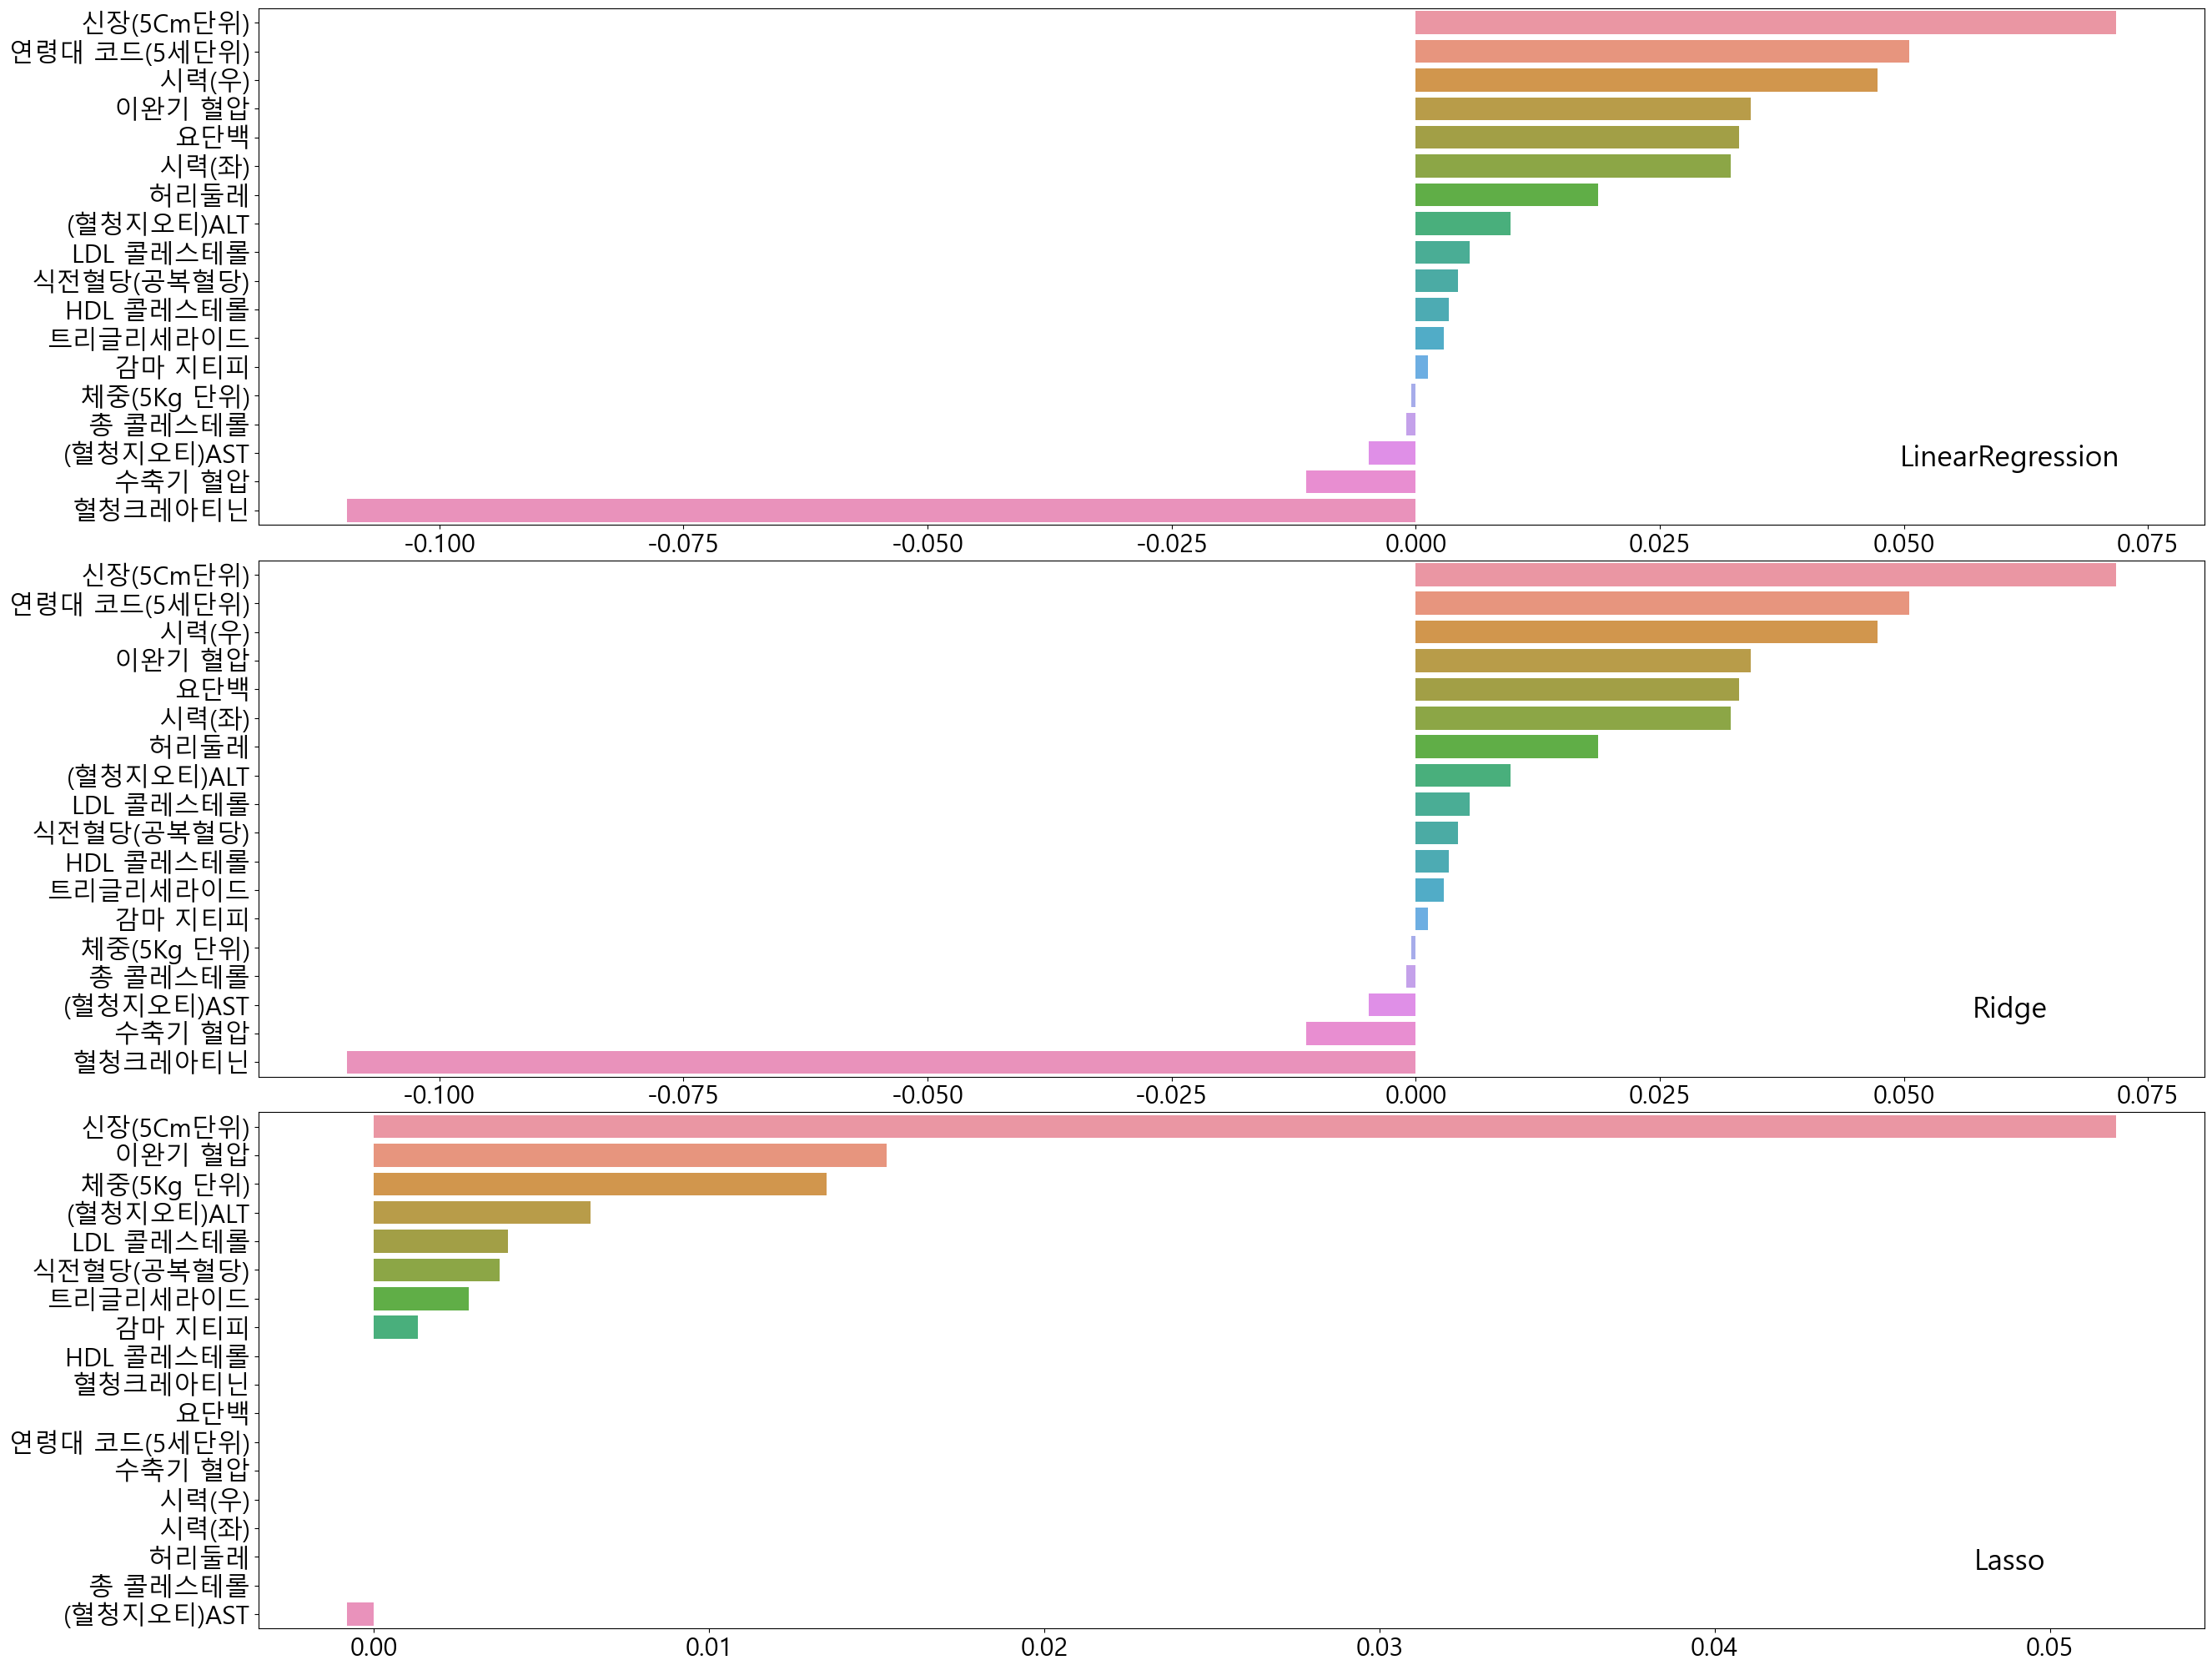

In [464]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models, xlim = (-0.1, 0.25))

모델의 적합성을 올리기 위한 교차 검증을 실행하기 위해 평균 RMSE값을 추출하는 함수를 생성함.

In [465]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models:
        mse_scores = -1*cross_val_score(model, X_features, y_target, 
                                        scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(mse_scores)
        rmse_avg = np.mean(rmse_scores)

        print(f"{model.__class__.__name__} CV RMSE 리스트: {np.round(rmse_scores,3)}")
        print(f"{model.__class__.__name__} CV 평균 RMSE: {rmse_avg:.3f}\n")

교차 검증한 결과 LASSO 모형의 성능은 아직도 다른 모형들에 비해 낮은 것을 확인.

In [466]:
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

LinearRegression CV RMSE 리스트: [1.437 1.457 1.426 1.466 1.447]
LinearRegression CV 평균 RMSE: 1.447

Ridge CV RMSE 리스트: [1.437 1.457 1.426 1.466 1.447]
Ridge CV 평균 RMSE: 1.447

Lasso CV RMSE 리스트: [1.459 1.474 1.445 1.481 1.469]
Lasso CV 평균 RMSE: 1.465



모델의 적합성을 올리기 위해 하이퍼 파라미터를 찾기 위한 함수 생성.

In [467]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    model_name = model.__class__.__name__
    grid_cv = GridSearchCV(model, param_grid=params, 
                           scoring='neg_mean_squared_error', cv=5)
    
    grid_cv.fit(X_features, y_target)
    best_rmse = np.sqrt(-1* grid_cv.best_score_)
    
    print(f'{model_name} GridSearchCV 최적 평균 RMSE: {np.round(best_rmse, 4)}, 최적 alpha:{grid_cv.best_params_}')
          
    return grid_cv.best_estimator_

하이퍼 파라미터를 구하기 위해 alpha값의 샘플을 일일히 바꿔보며 실행해본 결과 400, 0.001이 나옴.

In [468]:
# 하이퍼 파라미터
ridge_params = { 'alpha':[100, 150, 200, 250, 300, 400, 450 ,500] }
lasso_params = { 'alpha':[0.0005, 0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

# Ridge, Lasso
ridge_reg = Ridge()
lasso_reg = Lasso()

best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge GridSearchCV 최적 평균 RMSE: 1.4466, 최적 alpha:{'alpha': 400}
Lasso GridSearchCV 최적 평균 RMSE: 1.4466, 최적 alpha:{'alpha': 0.001}


최적의 하이퍼 파라미터로 수정해 적용하자 LASSO모형의 적합도가 올라갔으며 회귀계수의 분포 또한 선형회귀와 RIDGE회귀와 비슷한 양상을 띠게 됨.

# LinearRegression #
MAE: 5311007.940, RMSE: 19133324.802, RMSLE: 1.445
# Ridge #
MAE: 5310944.439, RMSE: 19169867.170, RMSLE: 1.445
# Lasso #
MAE: 5297863.934, RMSE: 18535762.121, RMSLE: 1.445


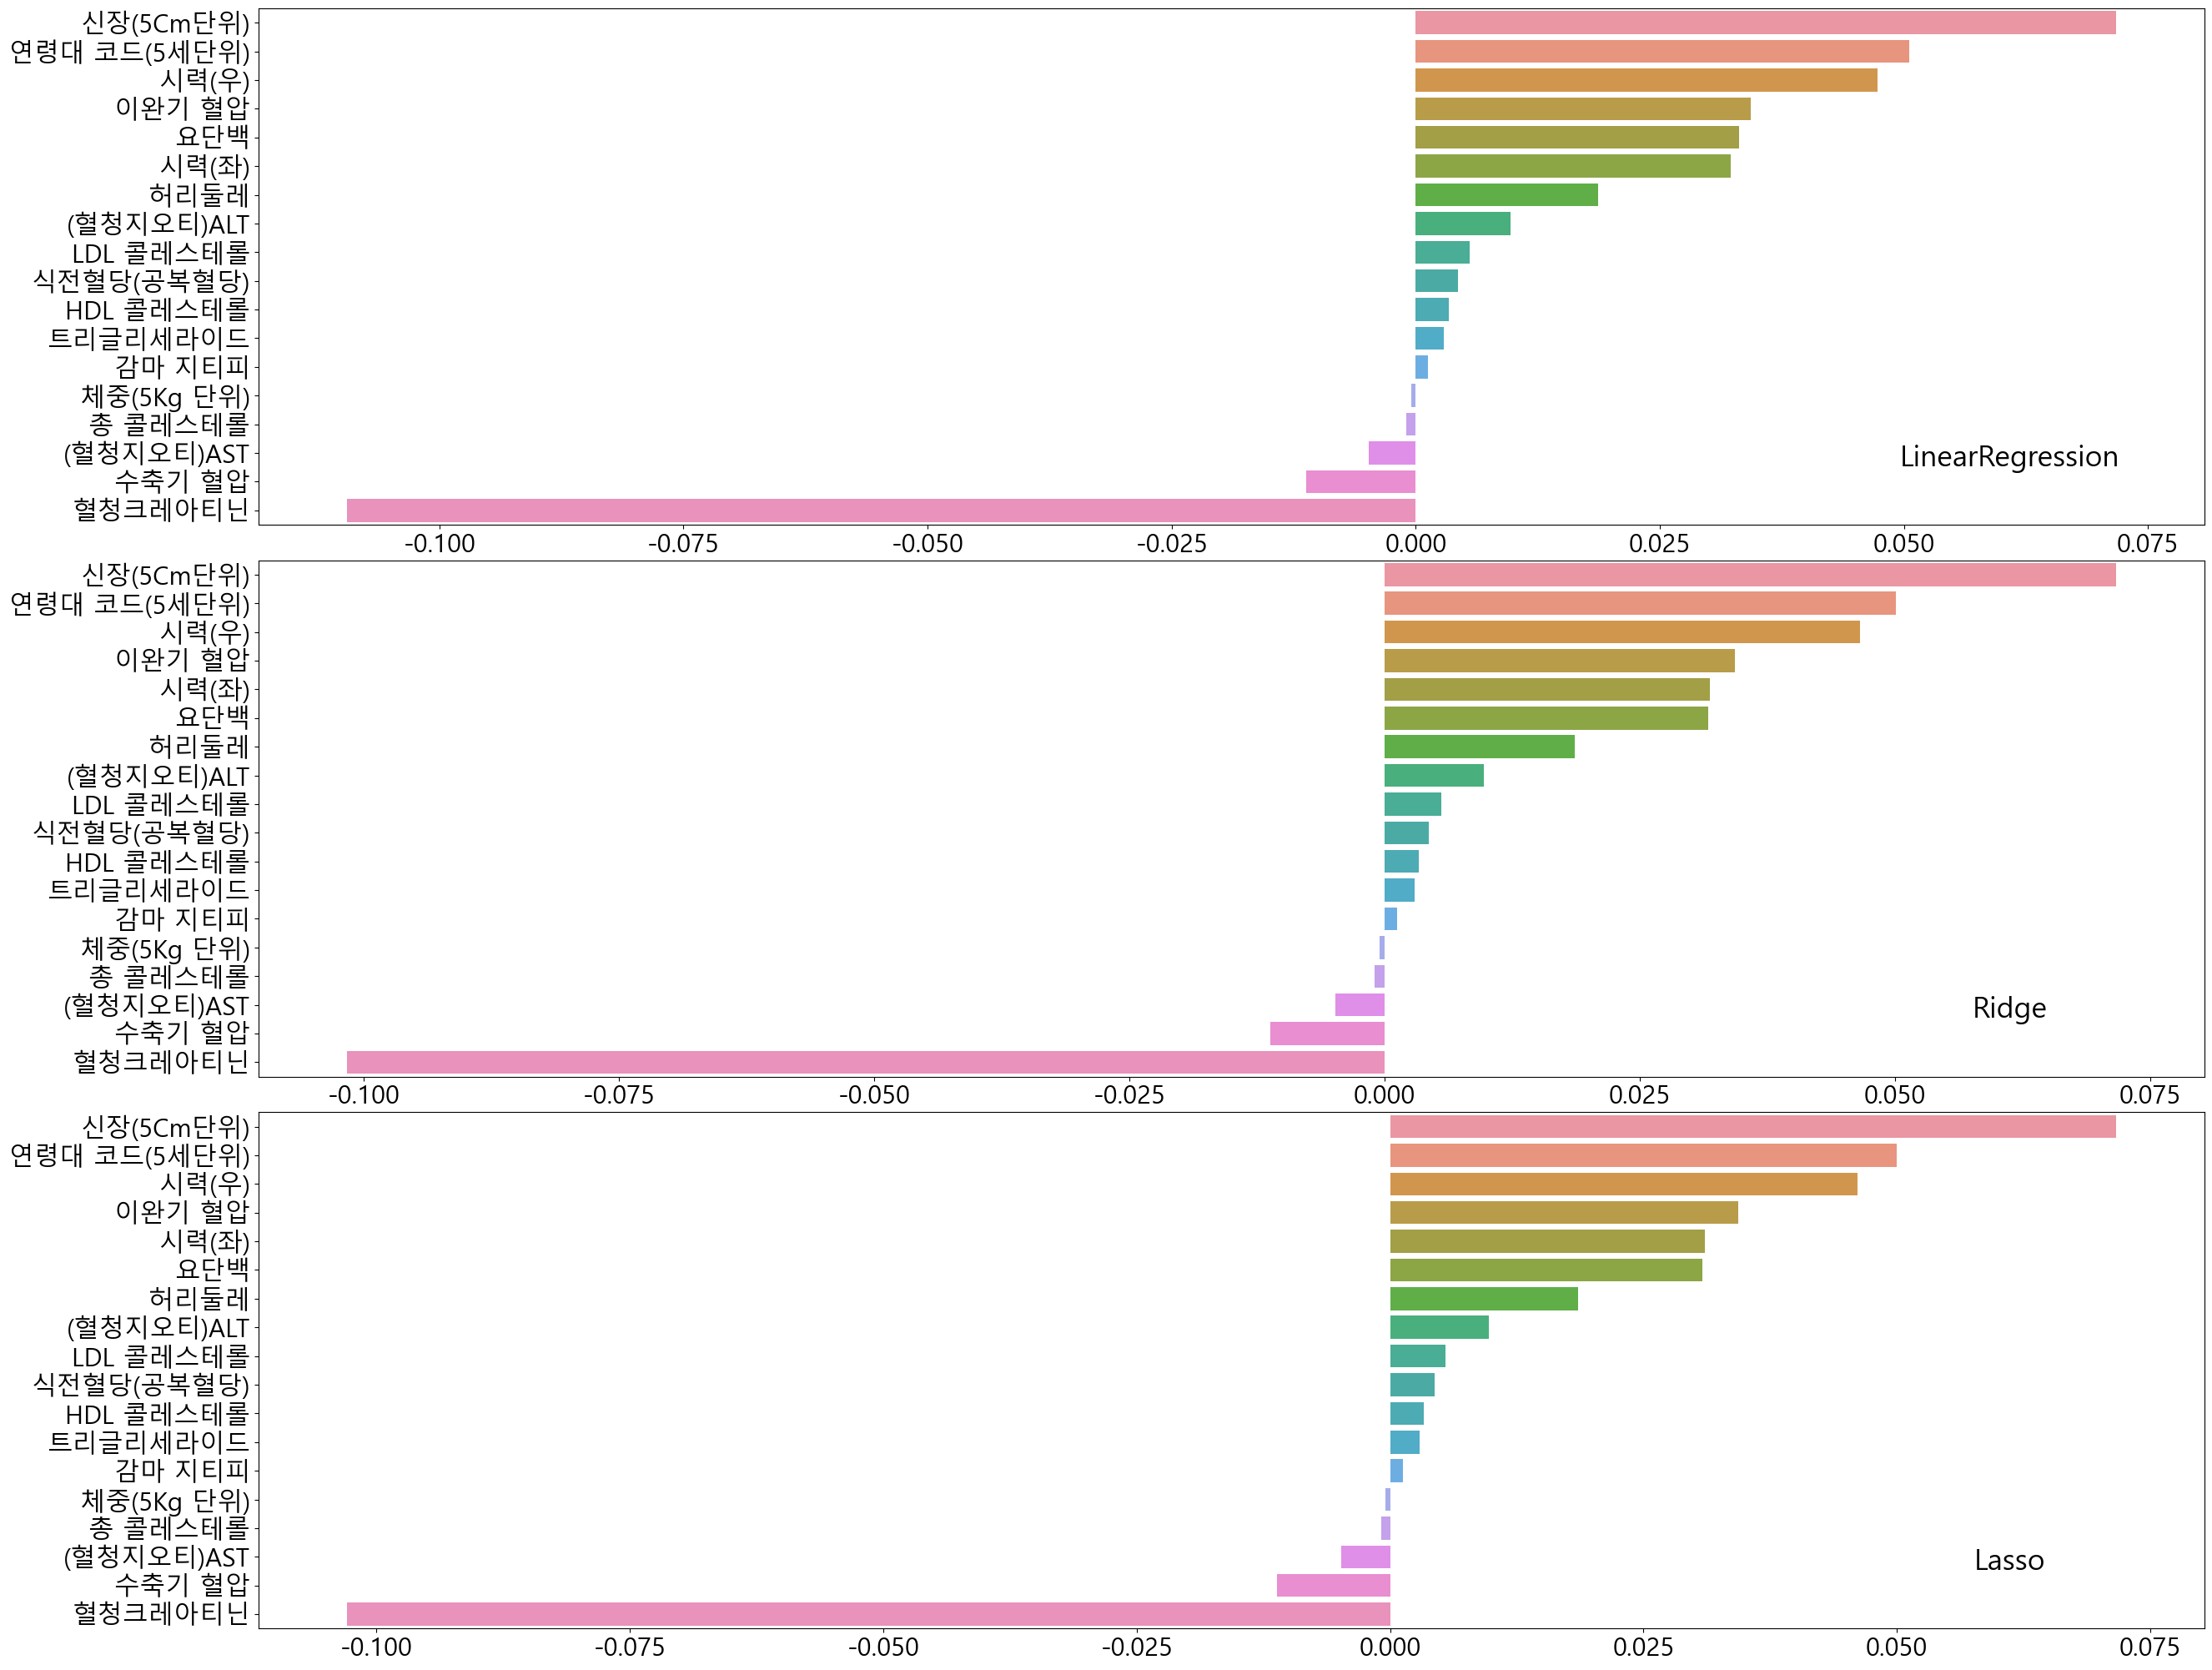

In [469]:
# 최적 하이퍼 파라미터로 Ridge, Lasso 수정
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=400)
lasso_reg = Lasso(alpha=0.001)

lr_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# test set RMSE
models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

# 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models, xlim=(-2.5,0.3))

변수의 왜곡도를 확인하기 위한 함수 생성. 왜곡도가 높은 변수들을 많이 확인할 수 있다.

In [470]:
from scipy.stats import skew

# 숫자형 피처 컬럼 index 
features_index = healthdata3.dtypes[healthdata3.dtypes != 'object'].index

# 피처(열)별로 왜곡도 산출
skew_features = healthdata3[features_index].apply(lambda x : skew(x), axis=0)

# 왜곡도가 1 이상
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

(혈청지오티)AST    20.403416
혈청크레아티닌       16.190562
(혈청지오티)ALT    11.567003
시력(우)          8.813663
시력(좌)          8.694270
감마 지티피         5.268658
요단백            2.586590
식전혈당(공복혈당)     2.584066
HDL 콜레스테롤      1.854121
LDL 콜레스테롤      1.401189
dtype: float64


변수를 로그변환하고 재분리하는 과정.

In [471]:
healthdata3[skew_features_top.index] = np.log1p(healthdata3[skew_features_top.index])

# 원-핫 인코딩
healthdata_log = pd.get_dummies(healthdata3)

# 데이터 재분리
X_features = healthdata_log.drop('혈색소',axis=1, inplace=False)
y_target = healthdata_log['혈색소']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

로그변환한 변수로 최적의 하이퍼 파라미터 값을 구하는 과정.

In [472]:
# 하이퍼 파라미터
ridge_params = { 'alpha':[0.1, 1, 3, 5, 10, 12, 13, 15, 17, 20] }
lasso_params = { 'alpha':[0.0005, 0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

# Ridge, Lasso
ridge_reg = Ridge()
lasso_reg = Lasso()

best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge GridSearchCV 최적 평균 RMSE: 1.3944, 최적 alpha:{'alpha': 12}
Lasso GridSearchCV 최적 평균 RMSE: 1.3945, 최적 alpha:{'alpha': 0.0005}


최적의 하이퍼 파라미터로 Ridge, Lasso 수정. 모형의 성능이 올라갔음을 확인할 수 있다.

# LinearRegression #
MAE: 14099472.187, RMSE: 808060785.919, RMSLE: 1.372
# Ridge #
MAE: 14083825.769, RMSE: 808060775.204, RMSLE: 1.372
# Lasso #
MAE: 14097014.024, RMSE: 808060803.836, RMSLE: 1.372


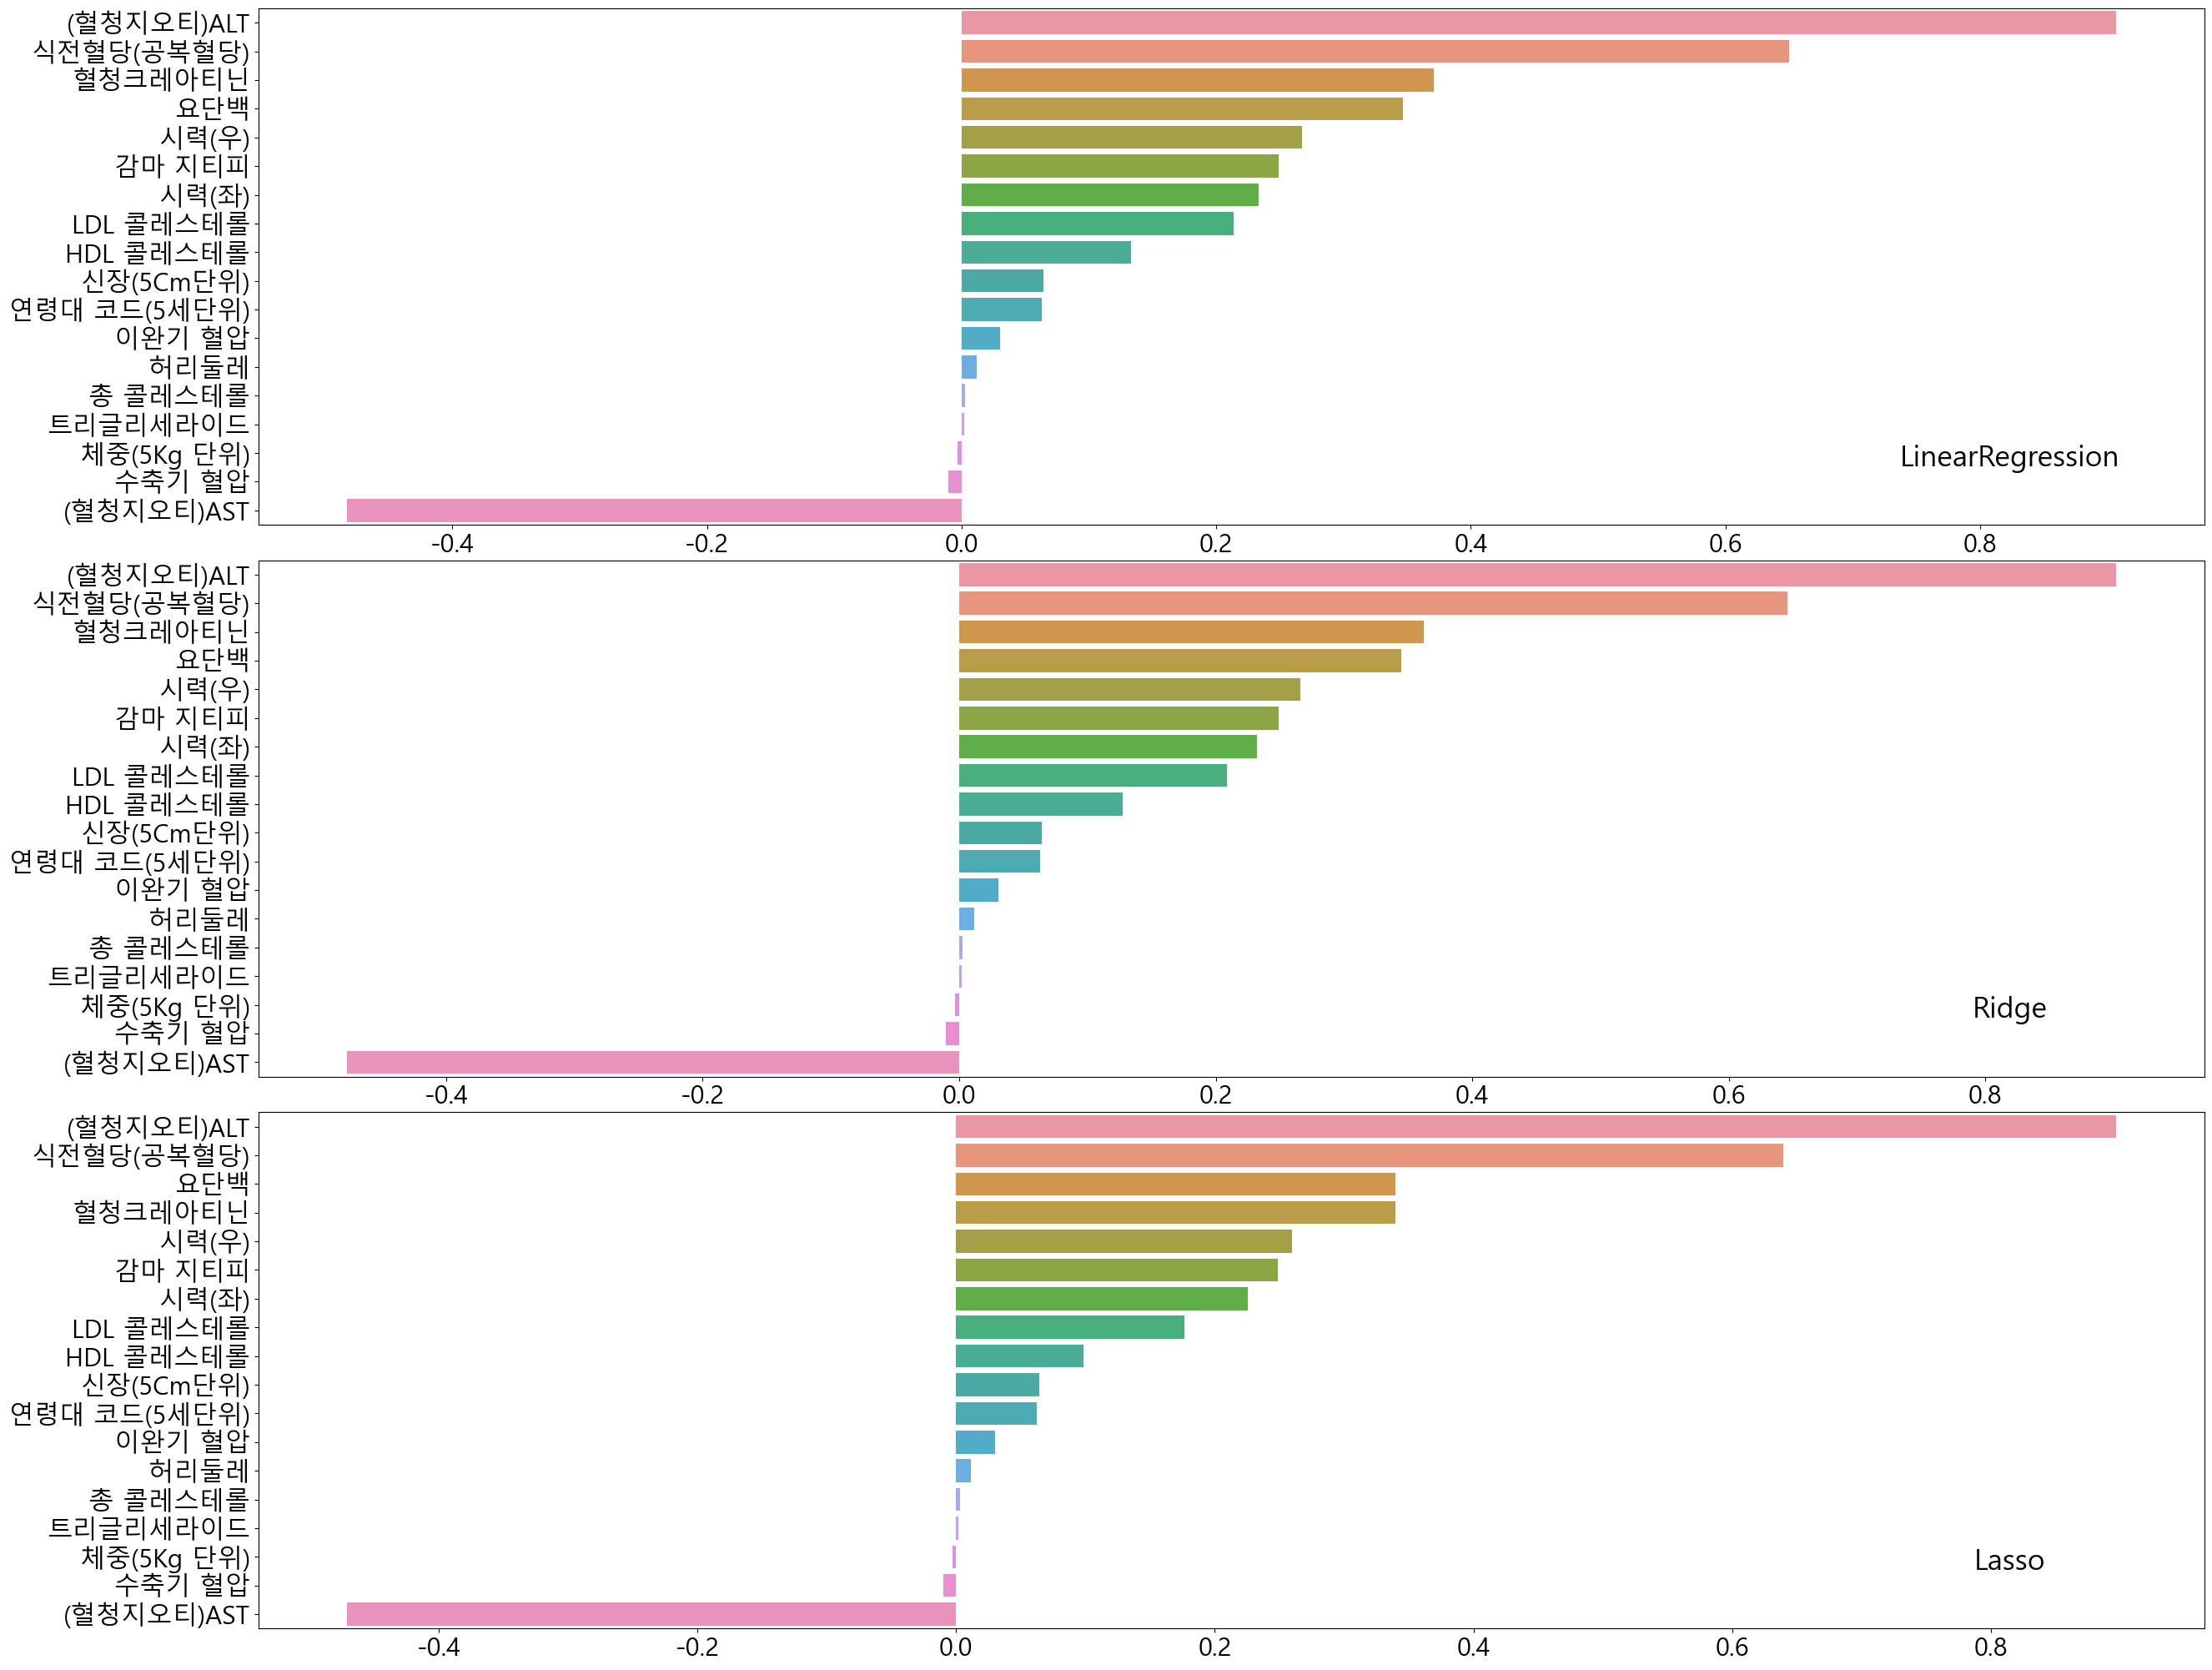

In [473]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=12)
lasso_reg = Lasso(alpha=0.0005)

lr_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

for model in models:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

# 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models, xlim=(-1.7,0.5))

혼합 예측. 최적의 하이퍼 파라미터로 40%의 RIDGE모형 예측값과 60%의 LASSO모형 예측값을 더하여 최종 예측값을 결정한다.

In [474]:
ridge_reg = Ridge(alpha=12)
lasso_reg = Lasso(alpha=0.0005)

ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 혼합 예측
fusion_pred = 0.4*ridge_pred + 0.6*lasso_pred

# 개별 예측, 혼합 예측 평가
preds = {
    "Ridge": ridge_pred, 
    "Lasso": lasso_pred, 
    "Fusion": fusion_pred
}

for model in models:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

# LinearRegression #
MAE: 14099472.187, RMSE: 808060785.919, RMSLE: 1.372
# Ridge #
MAE: 14098802.592, RMSE: 808060783.745, RMSLE: 1.372
# Lasso #
MAE: 14098134.399, RMSE: 808060794.266, RMSLE: 1.372
